In [123]:
import sys
import glob
import os
import itertools as it

import numpy as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

import invisible_cities.database.load_db as DB
import invisible_cities.io.pmaps_io as pmapio
import invisible_cities.core.fit_functions as fitf
import invisible_cities.reco.dst_functions as dstf

from invisible_cities.icaro.hst_functions import *
from icaro.core.fit_functions import *

In [124]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8
plt.rcParams[  "font.size"   ] = 15

In [63]:
run_number = 5780
path       = f"/Users/Gonzalo/github/NEXTdata/RunIV/{run_number}/"
filenames  = glob.glob(path + "*.h5")
datapmt    = DB.DataPMT (run_number)
datasipm   = DB.DataSiPM(run_number)

In [64]:
pmaps_dict = {}
for i, filename in enumerate(filenames):
    if not i % 100: print(i)
    try:
        pmaps_dict.update(pmapio.load_pmaps(filename))
    except Exception as e:
        print(i, str(e))

pmaps = list(pmaps_dict.values())

0
5 group ``/`` does not have a child named ``PMAPS``
16 group ``/`` does not have a child named ``PMAPS``
18 group ``/`` does not have a child named ``PMAPS``
19 group ``/`` does not have a child named ``PMAPS``
20 group ``/`` does not have a child named ``PMAPS``
21 group ``/`` does not have a child named ``PMAPS``
23 group ``/`` does not have a child named ``PMAPS``
28 group ``/`` does not have a child named ``PMAPS``
29 group ``/`` does not have a child named ``PMAPS``
30 group ``/`` does not have a child named ``PMAPS``
31 group ``/`` does not have a child named ``PMAPS``


In [104]:
def compute_z(pmap):
    t_s1 = pmap.s1s[0].time_at_max_energy if pmap.s1s else  1e8
    t_s2 = np.array([s2.time_at_max_energy for s2 in pmap.s2s])
    return (t_s2 - t_s1) / 1e3

In [105]:
e   = np.array([peak.total_energy for pmap in pmaps for peak in pmap.s2s])
ns1 = np.array([len(pmap.s1s) for pmap in pmaps])
ns2 = np.array([len(pmap.s2s) for pmap in pmaps])
z   = np.array(list(it.chain.from_iterable(map(compute_z, pmaps))))

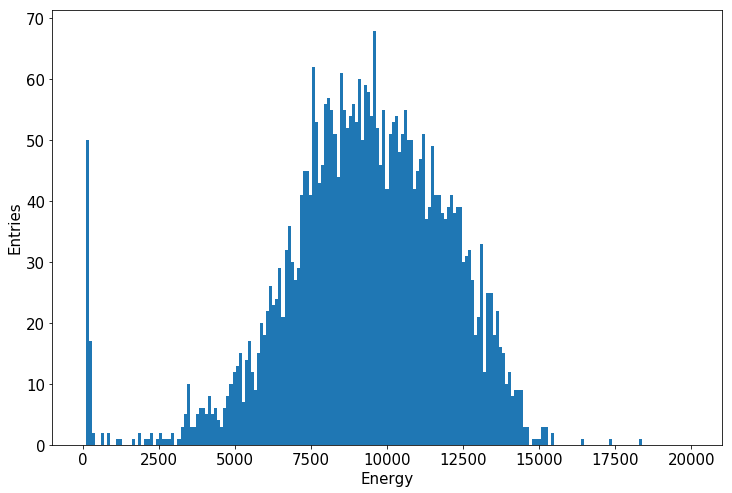

In [106]:
hist(e, np.linspace(0, 2e4, 200))
labels("Energy", "Entries")

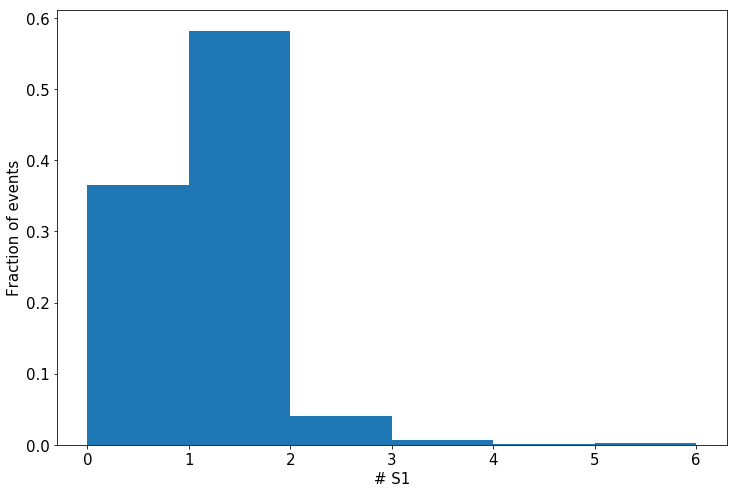

In [107]:
hist(ns1, np.arange(7), normed=True)
labels("# S1", "Fraction of events")

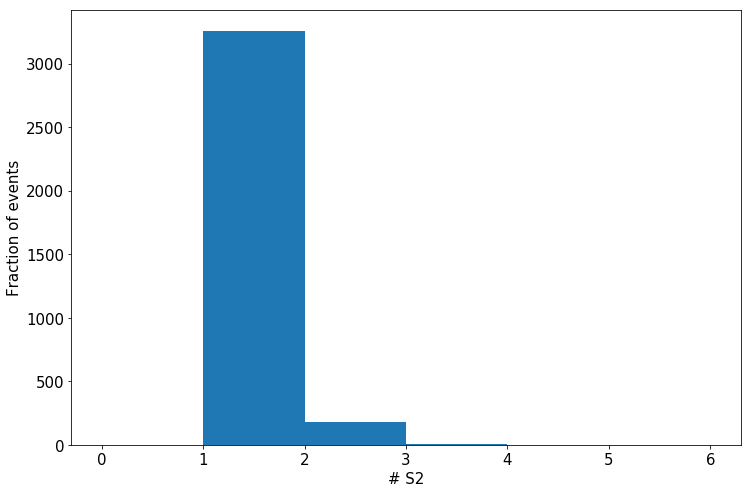

In [108]:
hist(ns2, np.arange(7))
labels("# S2", "Fraction of events")

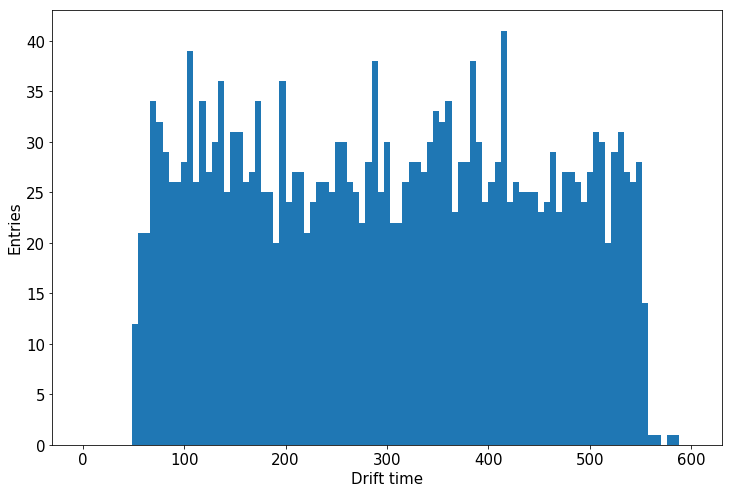

In [109]:
hist(z, np.linspace(0, 600, 100))
labels("Drift time", "Entries")

[ 11924.0812552  -1349.5236477]


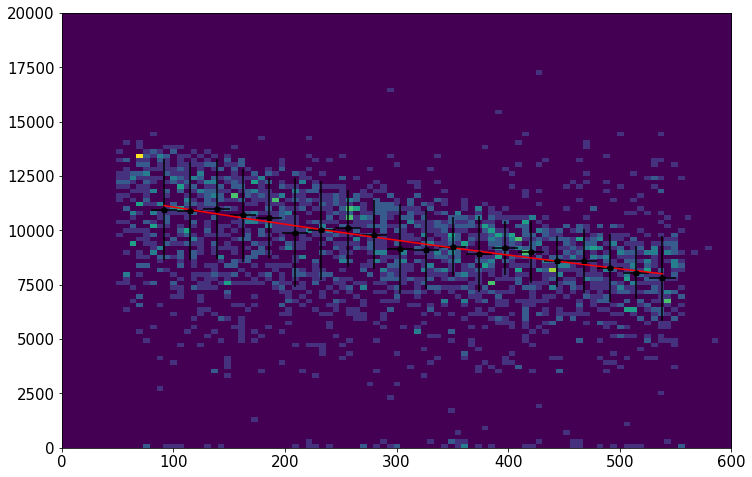

In [122]:
hist2d(z, e, (np.linspace(0, 600, 100), np.linspace(0, 2e4, 100)))

mean, sigma, chi2, ok = fit_slices_1d_gauss(z, e, np.linspace(80, 550, 21), np.linspace(6e3, 15e3), 50)
x = shift_to_bin_centers(np.linspace(80, 550, 21))
plt.errorbar(x, mean.value, sigma.value, np.diff(x)[0] / 2, "kp")

f = fitf.fit(fitf.expo, x, mean.value, (1e4, -1e3))
plt.plot(x, f.fn(x), "r-")
print(f.values)

[ 10932.67921704  -1582.36846229]


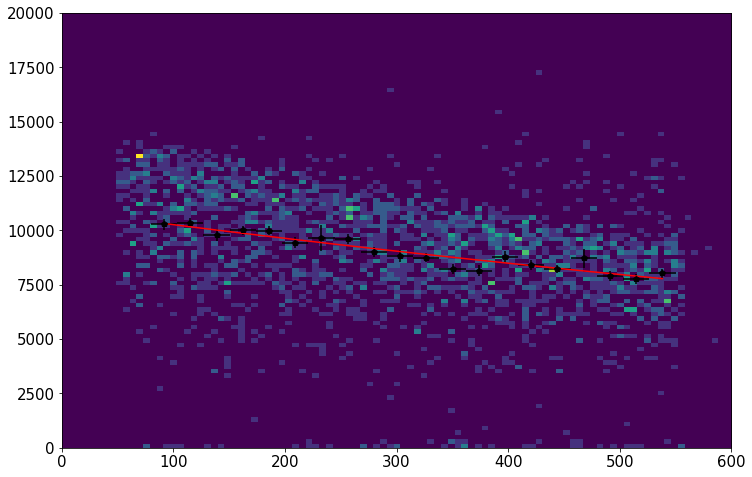

In [111]:
hist2d(z, e, (np.linspace(0, 600, 100), np.linspace(0, 2e4, 100)))
x, y, u = fitf.profileX(z, e, 20, (80, 550))
plt.errorbar(x, y, u, np.diff(x)[0]/2, "pk")

f = fitf.fit(fitf.expo, x, y, (1e4, -1e3))
plt.plot(x, f.fn(x), "r-")
print(f.values)

In [ ]:
z = 100 -> E = 12500
z = 100 -> E = 12500
z = 100 -> E = 12500